In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import quandl as qd
import datetime as dt

In [65]:
end=dt.datetime.now()
start=dt.datetime(year=end.year-1,month=end.month,day=end.day)
print('from {} to {}'.format(start.strftime('%m/%d/%Y'),end.strftime('%m/%d/%Y')))

from 09/01/2018 to 09/01/2019


In [67]:
aapl,msft,goog= (qd.get("WIKI/" + s, start_date=start, end_date=end) for s in ['AAPL','MSFT','GOOG'])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": aapl["Adj. Close"],
                      "MSFT": msft["Adj. Close"],
                      "GOOG": goog["Adj. Close"]})
 
stocks.head()

KeyboardInterrupt: 

In [ ]:
stocks.plot(secondary_y=['AAPL','MSFT'],grid=True)

In [ ]:
stock_return = stocks.apply(lambda x:x/x[0])

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use('classic')
#plt.style.use('seaborn')
stock_return.plot(grid=True).axhline(y=1, color='black',lw=2)

In [ ]:
stock_daily_return = stocks.apply(lambda x: np.log(x/x.shift(1)))

In [ ]:
plt.figure(figsize=(10,7))
#plt.style.use('classic')
plt.style.use('seaborn')
stock_daily_return.plot(grid=True)

In [ ]:
stock_daily_return.hist(bins=50)
cum_daily_return=(1+stock_daily_return).cumprod()
cum_daily_return.plot()

In [ ]:
aapl = qd.get('WIKI/AAPL', start_date=start, end_date=end)

In [ ]:
aapl['return'] = np.log(aapl.Close/aapl.Close.shift(1))

In [ ]:
aapl['ma30'] = aapl['Close'].rolling(30).mean()
aapl['ma100'] = aapl['Close'].rolling(100).mean()

In [ ]:
fig, ax1=plt.subplots()
ax1.plot(aapl['return'], color='red')
ax2=ax1.twinx()
ax2.plot(aapl.ma30)
ax2.plot(aapl.Close)
plt.legend()

In [ ]:
aapl.to_csv('./aapl.csv')

In [57]:
aapl=pd.read_csv('./aapl.csv')

In [58]:
type(aapl)

pandas.core.frame.DataFrame

In [59]:
aapl.columns
#aapl.head(5)
#aapl.dropna(inplace=True)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'return', 'ma30', 'ma100'],
      dtype='object')

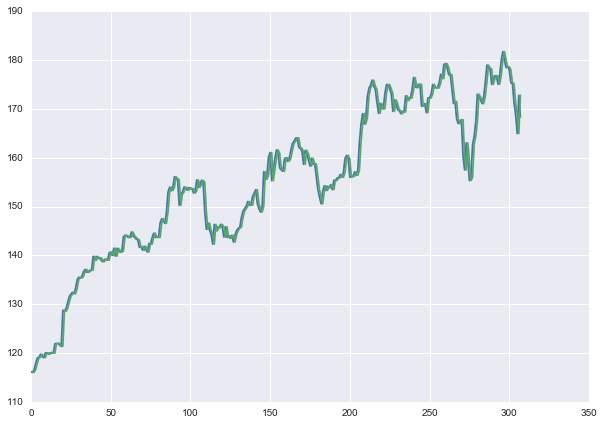

In [60]:
plt.figure(figsize=(10,7))
#plt.style.use('classic')
plt.style.use('seaborn')
plt.plot(aapl.Close)
plt.plot(aapl.Close.shift(1))

In [61]:
aapl['return'] = np.log(aapl.Close/aapl.Close.shift(1))

In [62]:
aapl['ma30'] = aapl['Close'].rolling(30).mean()
aapl['ma100'] = aapl['Close'].rolling(100).mean()

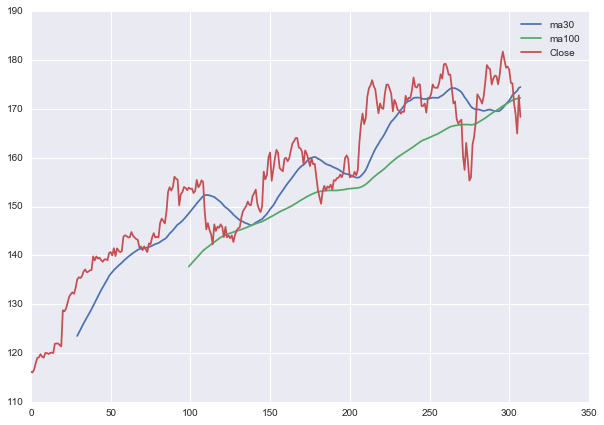

In [63]:
plt.figure(figsize=(10,7))
plt.plot(aapl.ma30)
plt.plot(aapl.ma100)
plt.plot(aapl.Close)
plt.legend()